In [4]:
#import standard data sci libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ! pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [5]:
df = pd.read_csv('Telangana.csv')

In [6]:
df.columns

Index(['From Date', 'To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5',
       'State', 'City', 'Station', 'AQI', 'AQI Category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   From Date     8760 non-null   object 
 1   To Date       8760 non-null   object 
 2   Ozone         6130 non-null   float64
 3   CO            6124 non-null   float64
 4   SO2           6138 non-null   float64
 5   NO2           6141 non-null   float64
 6   PM10          6104 non-null   float64
 7   PM2.5         6103 non-null   float64
 8   State         8760 non-null   object 
 9   City          8760 non-null   object 
 10  Station       8760 non-null   object 
 11  AQI           6153 non-null   float64
 12  AQI Category  6153 non-null   object 
dtypes: float64(7), object(6)
memory usage: 889.8+ KB


In [9]:
df.isnull().sum()

From Date          0
To Date            0
Ozone           2630
CO              2636
SO2             2622
NO2             2619
PM10            2656
PM2.5           2657
State              0
City               0
Station            0
AQI             2607
AQI Category    2607
dtype: int64

In [10]:
df.describe()

,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI
count,6130.000000,6124.000000,6138.000000,6141.000000,6104.000000,6103.000000,6153.000000
mean,20.114829,0.674891,8.254451,15.515050,78.131186,36.535981,80.375752
std,16.904719,0.396751,6.403741,14.854748,39.010211,18.844151,36.695544
min,0.400000,0.000000,0.150000,0.170000,4.470000,0.840000,8.000000
25%,12.620000,0.430000,4.610000,5.360000,48.350000,22.370000,52.000000
50%,16.350000,0.620000,6.450000,8.570000,71.200000,33.820000,74.000000
75%,21.510000,0.810000,9.720000,22.360000,100.217500,47.925000,103.000000
max,181.700000,7.030000,69.520000,123.810000,242.260000,113.530000,278.000000


In [11]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

df.head()

['From Date', 'To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'State', 'City', 'Station', 'AQI', 'AQI Category']
Index(['from_date', 'to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5',
       'state', 'city', 'station', 'aqi', 'aqi_category'],
      dtype='object')


,from_date,to_date,ozone,co,so2,no2,pm10,pm2.5,state,city,station,aqi,aqi_category
0,01-08-2021 00:00,02-08-2021 00:00,10.73,0.80,7.68,59.17,35.24,9.76,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",74.0,Moderate
1,02-08-2021 00:00,03-08-2021 00:00,7.80,0.12,7.86,37.23,59.63,18.54,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",60.0,Moderate
2,03-08-2021 00:00,04-08-2021 00:00,11.32,0.33,15.62,15.85,64.41,21.17,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",64.0,Moderate
3,04-08-2021 00:00,05-08-2021 00:00,7.03,0.29,19.49,13.93,45.94,12.65,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",46.0,Good
4,05-08-2021 00:00,06-08-2021 00:00,7.12,0.29,23.43,15.69,56.57,16.21,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",57.0,Moderate


In [12]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 13 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
pm2.5,2657,30.300000
pm10,2656,30.300000
co,2636,30.100000
ozone,2630,30.000000
so2,2622,29.900000
no2,2619,29.900000
aqi,2607,29.800000
aqi_category,2607,29.800000


In [13]:
city_day = df.copy()

In [14]:
city_day['Particulate_Matter'] = city_day['pm2.5']+city_day['pm10']

In [15]:
pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']


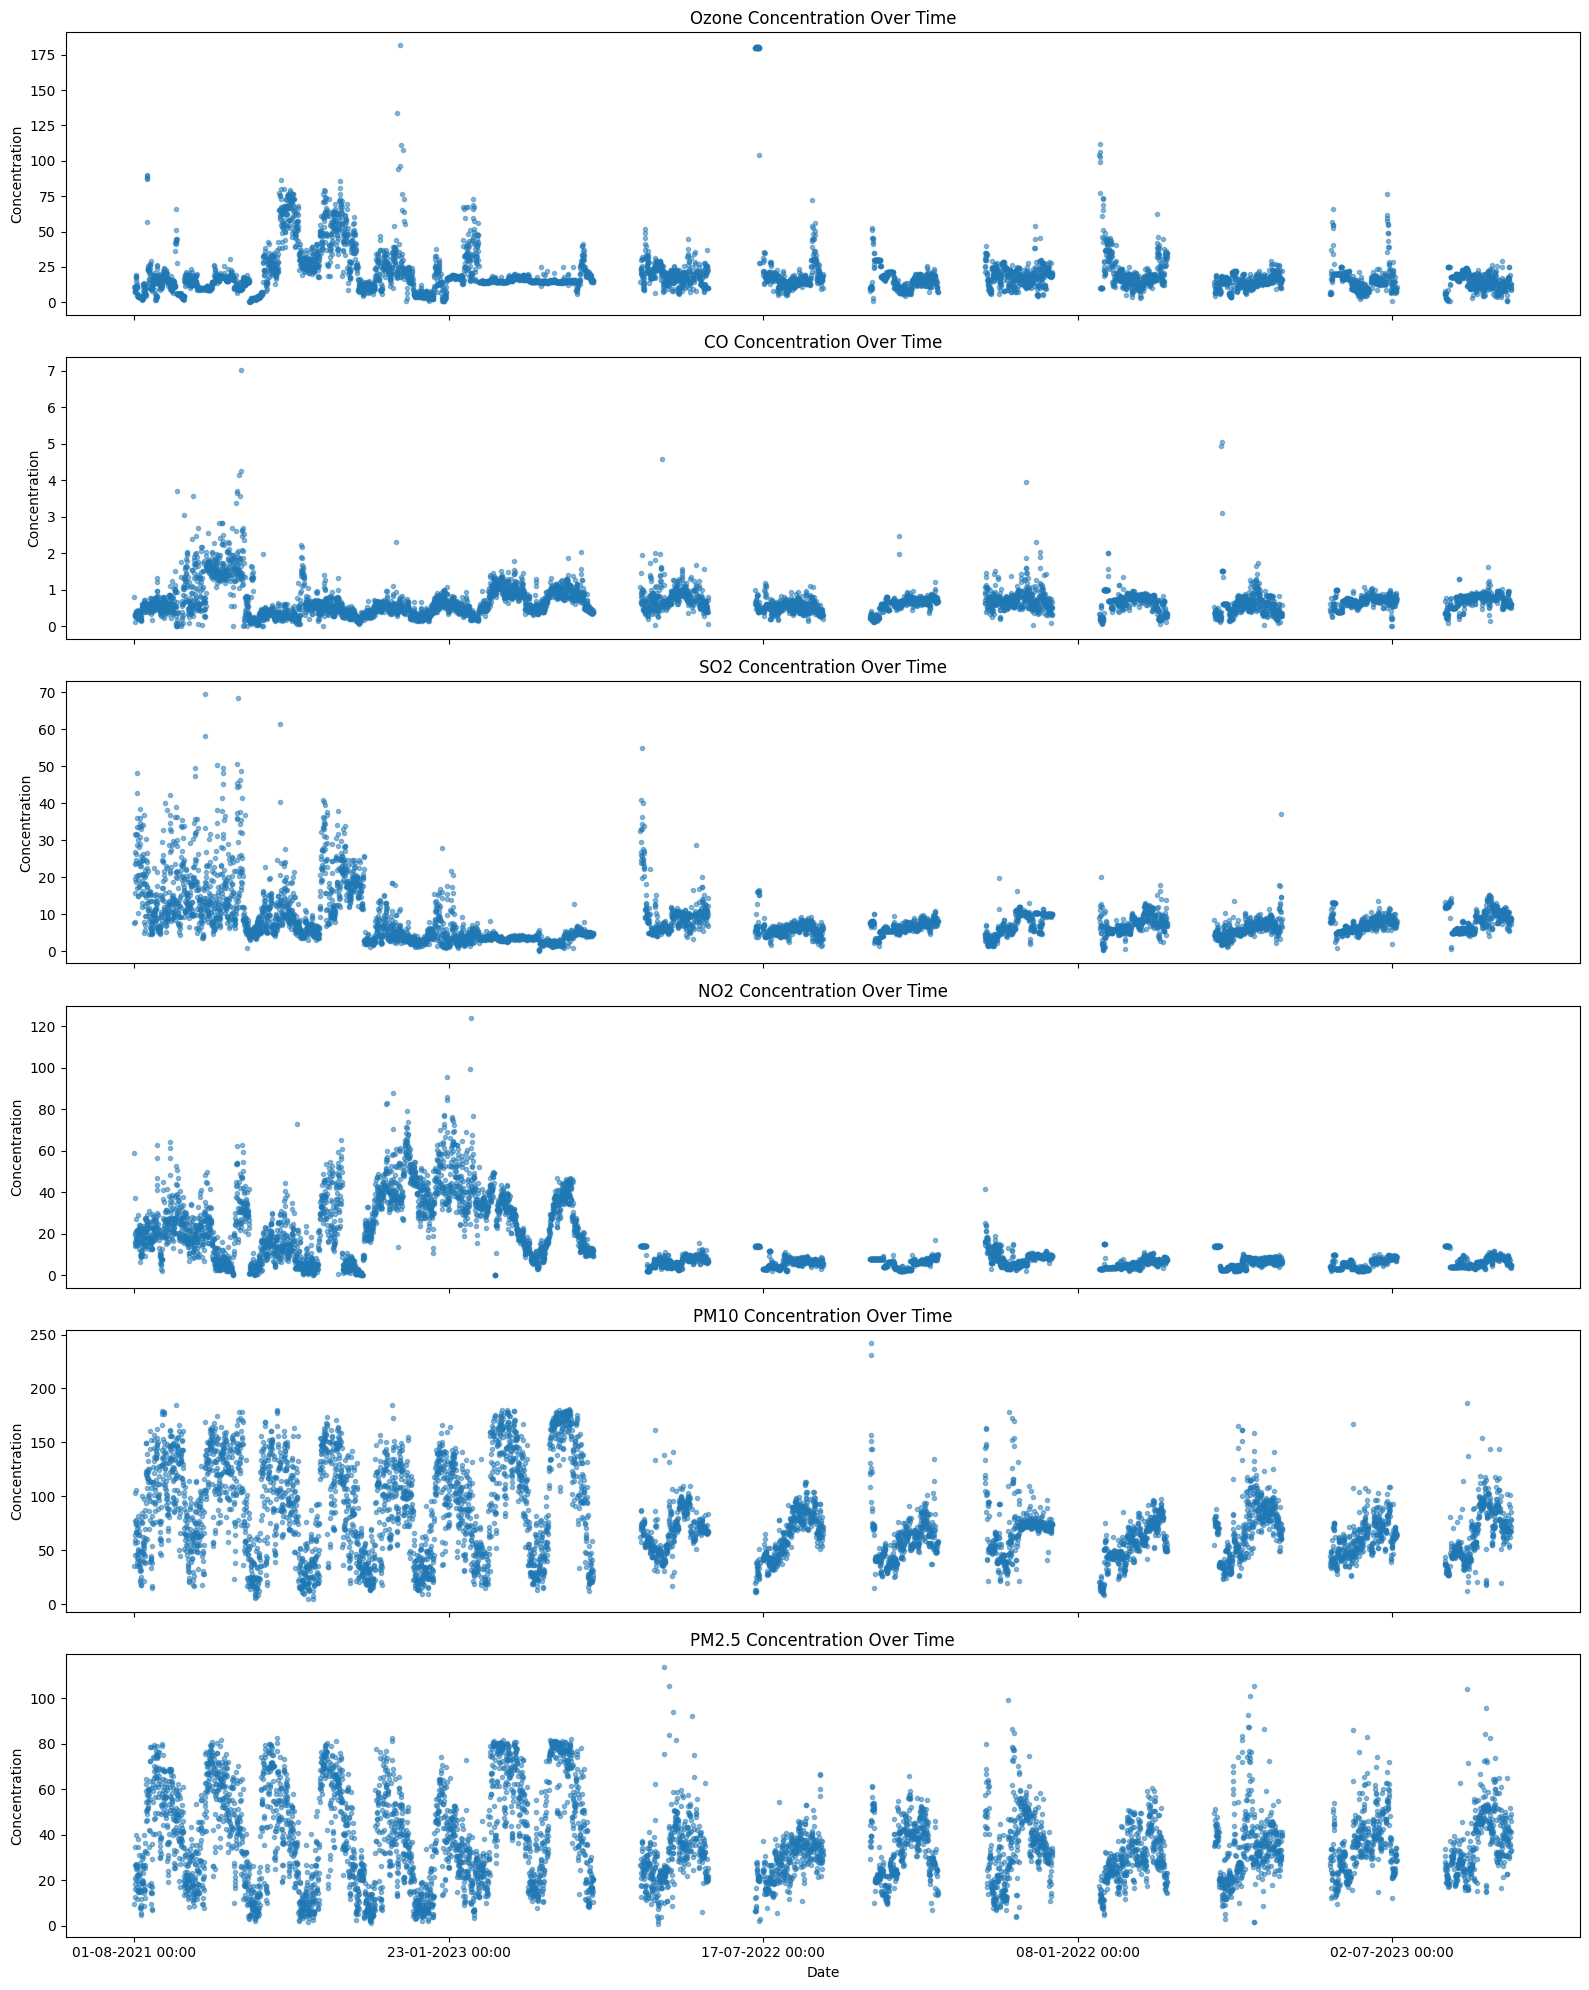

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. RELOAD THE DATA to ensure the column exists
df = pd.read_csv("Telangana.csv")


df.set_index('From Date', inplace=True)

fig, axes = plt.subplots(len(pollutants), 1, figsize=(16, 20), sharex=True)

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(
        ax=axes[i],
        marker='.', 
        alpha=0.5, 
        linestyle='None',
        title=f'{pollutant} Concentration Over Time'
    )
    
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration') 

plt.tight_layout()
plt.show()

In [17]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
# def display_side_by_side(*args):
#     html_str=''
#     for df in args:
#         html_str+=df.render()
#     display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def display_side_by_side(*args):
    """
    Displays Pandas Styler objects side-by-side by converting them to HTML.
    """
    html_str = ''
    
    # *** CHANGE THIS LINE ***
    for df in args:
        html_str += df.to_html() # Use .to_html() instead of .render()
        
    # The replacement is to ensure the tables are displayed inline, not stacked.
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [18]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant, 'city']].groupby('city').mean().sort_values(by=pollutant, ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant], 2)
    return x1.head(10).style.background_gradient(cmap='OrRd')

In [19]:
pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']

pm2_5 = max_polluted_city('pm2.5')
pm10 = max_polluted_city('pm10')
no2 = max_polluted_city('no2')
so2 = max_polluted_city('so2')
co = max_polluted_city('co')
ozone = max_polluted_city('ozone')


display_side_by_side(pm2_5, pm10, no2, so2, co, ozone)

,city,pm2.5
0,Hyderabad,36.540000
,city,pm10
0,Hyderabad,78.130000
,city,no2
0,Hyderabad,15.520000
,city,so2
0,Hyderabad,8.250000
,city,co
0,Hyderabad,0.670000
,city,ozone


In [20]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['Ozone']=df1['Ozone'].fillna((df1['Ozone'].median()))


In [21]:
df1['City'].value_counts()

City
Hyderabad    8760
Name: count, dtype: int64

In [22]:
df1['Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO2']+df1['CO']+df1['SO2']+df1['Ozone']

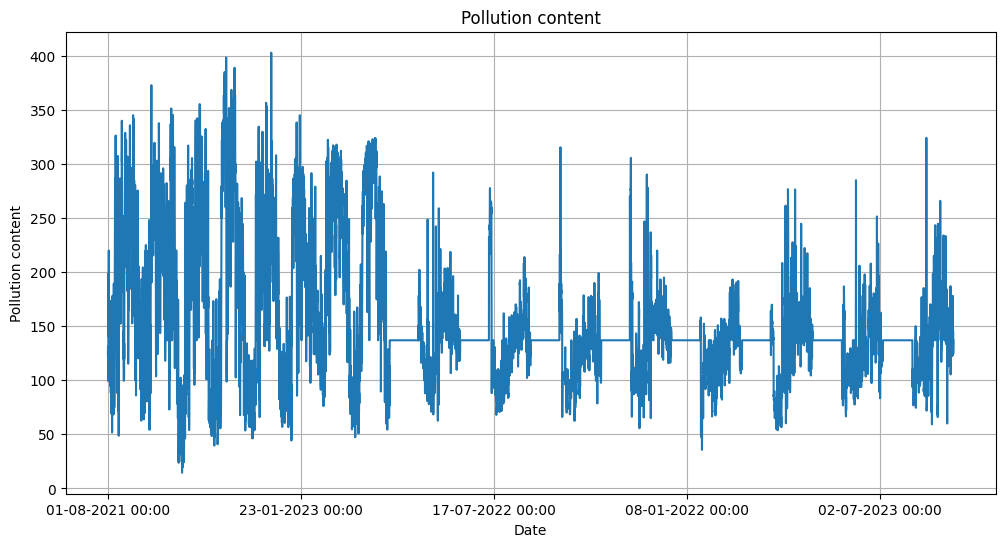

In [23]:
import matplotlib.pyplot as plt

def ploting(var):
    # Correction: Replace the problematic iplot call with standard pandas.plot(),
    # which uses matplotlib for stability.
    ax = df1[var].plot(figsize=(12, 6), title=var)
    
    # Set labels using the standard matplotlib Axis methods
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    plt.grid(True)
    plt.show()

ploting('Pollution content')

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load Dataset
# ---------------------------
df = pd.read_csv('Telangana.csv')
# df['From Date'] = pd.to_datetime(df['From Date'], format='%Y-%m-%d')

# Preserve 'From Date' as a column
# df.set_index('From Date', inplace=False)

# ---------------------------
# 2. AQI Calculation
# ---------------------------
breakpoints = {
    'PM2.5': [(0,50,0,30),(51,100,31,60),(101,200,61,90),(201,300,91,120),(301,400,121,250),(401,500,251,500)],
    'PM10': [(0,50,0,50),(51,100,51,100),(101,200,101,250),(201,300,251,350),(301,400,351,430),(401,500,431,500)],
    'NO2': [(0,50,0,40),(51,100,41,80),(101,200,81,180),(201,300,181,280),(301,400,281,400),(401,500,401,500)],
    'Ozone': [(0,50,0,50),(51,100,51,100),(101,200,101,168),(201,300,169,208),(301,400,209,748),(401,500,749,1000)],
    'CO': [(0,50,0,1.0),(51,100,1.1,2.0),(101,200,2.1,10),(201,300,10.1,17),(301,400,17.1,34),(401,500,34.1,50)],
    'SO2': [(0,50,0,40),(51,100,41,80),(101,200,81,380),(201,300,381,800),(301,400,801,1600),(401,500,1601,2000)]
}

def get_aqi_sub_index(C, pollutant):
    if pd.isna(C) or C < 0: return np.nan
    for I_Lo, I_Hi, B_Lo, B_Hi in breakpoints[pollutant]:
        if C >= B_Lo and C <= B_Hi:
            return round(((I_Hi-I_Lo)/(B_Hi-B_Lo))*(C-B_Lo)+I_Lo) if B_Hi!=B_Lo else I_Lo
    return 500 if C>breakpoints[pollutant][-1][3] else np.nan

def calculate_aqi(row):
    sub_indices = [
        get_aqi_sub_index(row['PM2.5'], 'PM2.5'),
        get_aqi_sub_index(row['PM10'], 'PM10'),
        get_aqi_sub_index(row['NO2'], 'NO2'),
        get_aqi_sub_index(row['Ozone'], 'Ozone'),
        get_aqi_sub_index(row['CO'], 'CO'),
        get_aqi_sub_index(row['SO2'], 'SO2')
    ]
    return np.nanmax(sub_indices) if any(~np.isnan(sub_indices)) else np.nan

def get_aqi_category(aqi):
    if pd.isna(aqi): return np.nan
    elif aqi <= 50: return 'Good'
    elif aqi <= 200: return 'Moderate'
    else: return 'Severe'

# --- 4. Apply Functions to DataFrame ---

# Rename columns to match the breakpoints keys (assuming standard names in your CSV)
# You can comment this out if your column names are already 'PM2.5', 'PM10', etc.
df.rename(columns={'PM2.5': 'PM2.5', 'PM10': 'PM10', 'Ozone': 'Ozone',
                   'CO': 'CO', 'SO2': 'SO2', 'NO2': 'NO2'}, inplace=True)

# Calculate the AQI for each row
df['AQI'] = df.apply(calculate_aqi, axis=1)

# Assign the AQI category
df['AQI Category'] = df['AQI'].apply(get_aqi_category)

# --- 5. Display and Save (Optional) ---

print(df[['PM2.5', 'PM10', 'AQI', 'AQI Category']].head())

# If you want to save the updated DataFrame for your EDA report:
df.to_csv('Telangana.csv', index=False)

   PM2.5   PM10   AQI AQI Category
0   9.76  35.24  74.0     Moderate
1  18.54  59.63  60.0     Moderate
2  21.17  64.41  64.0     Moderate
3  12.65  45.94  46.0         Good
4  16.21  56.57  57.0     Moderate


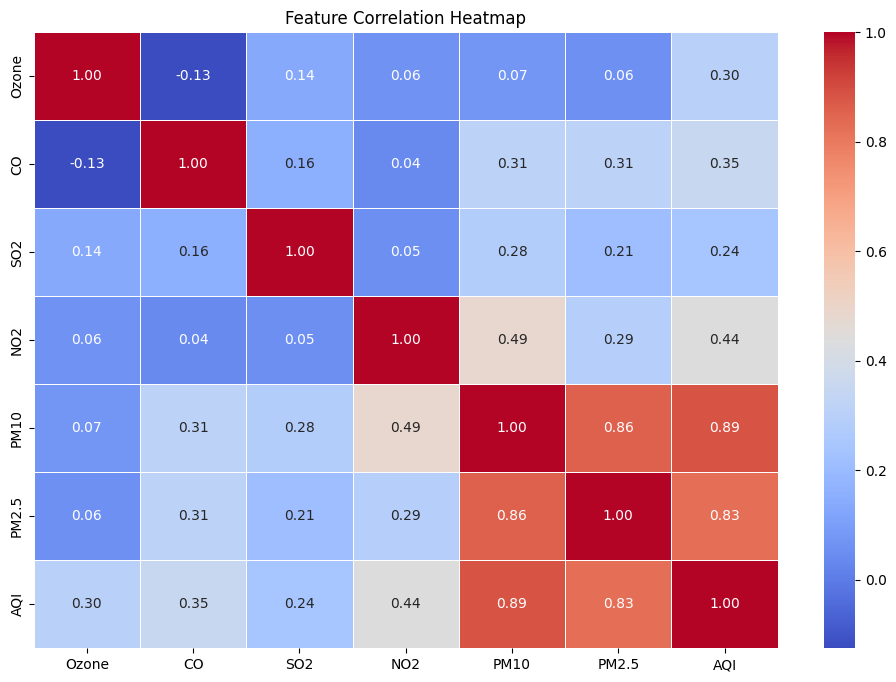

In [212]:
drop_columns = ['City', 'AQI Category', 'State', 'Station']
df = df.drop(columns=drop_columns)

# Define target and features
target = 'AQI'
features = [col for col in df.columns if col != target]

X = df[features]  # Features dataset
y = df[target]    # Target variable

# Select only numeric columns for correlation
num_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [26]:
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv("Telangana.csv")

In [28]:
import pandas as pd
from pandas_profiling import ProfileReport # Or ydata_profiling

# --- 1. Load Data ---
# Use the file you need (either the original or the one with AQI)
data = pd.read_csv('Telangana.csv') 

# --- 2. CRITICAL FIX: Clean Column Names ---
# This removes any hidden spaces or special characters around column names
data.columns = data.columns.str.strip() 

# try:
#     data['From Date'] = pd.to_datetime(data['From Date'], format='%Y-%m-%d')
#     data.set_index('From Date', inplace=True)
# except KeyError:
#     print("Column 'From Date' not found after stripping whitespace. Check column names.")
    
profile = data.profile_report(title="EDA with AQI", explorative=True)
profile.to_file(output_file="EDA.html")

print("The EDA.html report is being regenerated with clean column names and time series plots.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The EDA.html report is being regenerated with clean column names and time series plots.


In [29]:
print(city_day.columns.tolist())

['from_date', 'to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5', 'state', 'city', 'station', 'aqi', 'aqi_category', 'Particulate_Matter']


               Model         MSE       RMSE       MAE        R2
0  Linear Regression  149.590167  12.230706  5.989872  0.840447
1      Random Forest   18.310031   4.279022  1.131348  0.980470
2            XGBoost   20.735734   4.553651  1.534239  0.977883


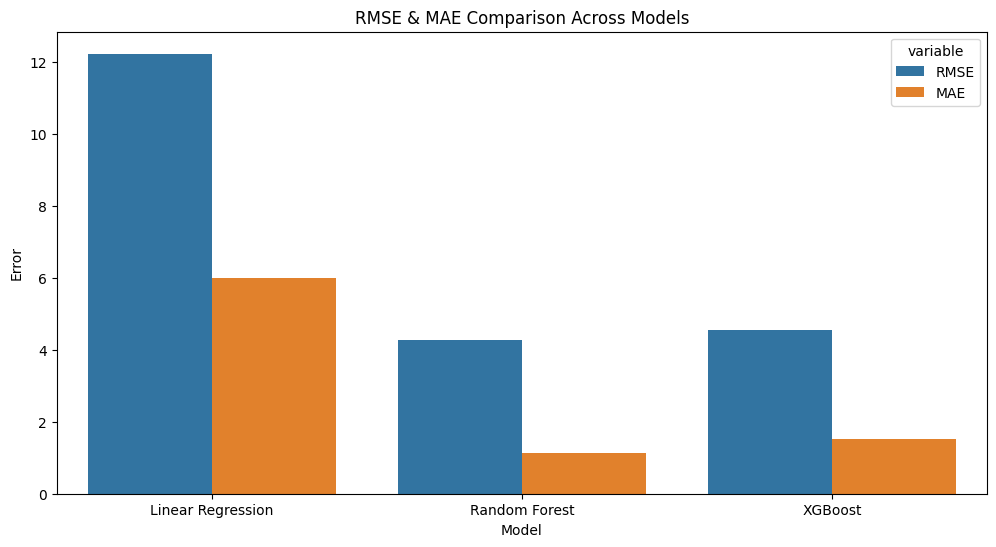

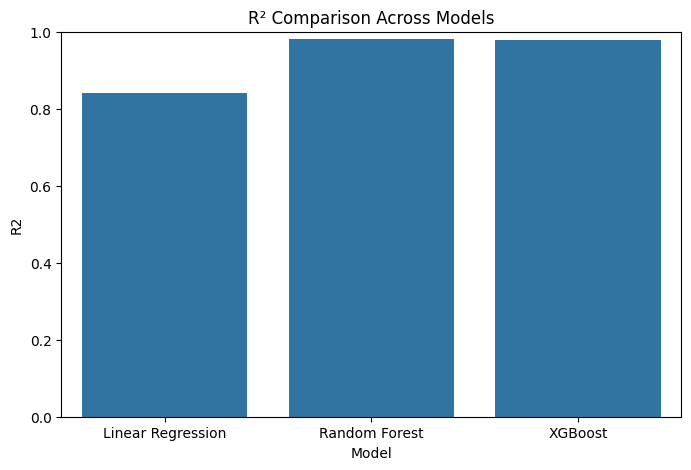


 Best Model: Random Forest
R²: 0.9805, RMSE: 4.28, MAE: 1.13


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load Dataset
# ---------------------------
df = pd.read_csv('Telangana.csv')
# df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')
# df.set_index('From Date', inplace=True)

# ---------------------------
# 2. Prepare Features & Target
# ---------------------------
features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = 'AQI'

X = df[features].fillna(df[features].mean())  # Fill missing values with mean
y = df[target].fillna(df[target].mean())

# ---------------------------
# 3. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Correct way to add Gaussian noise
noise_factor = 0.03
noise = noise_factor * X_train.std().values * np.random.randn(*X_train.shape)
X_train_noisy = X_train + noise

# ---------------------------
# 4. Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 5. Initialize Models
# ---------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# ---------------------------
# 6. Train, Predict & Evaluate
# ---------------------------
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })
    
results_df = pd.DataFrame(results)
print(results_df)

# ---------------------------
# 7. Visual Comparison
# ---------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=results_df.melt(id_vars='Model', value_vars=['RMSE', 'MAE']),
            x='Model', y='value', hue='variable')
plt.title('RMSE & MAE Comparison Across Models')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('R² Comparison Across Models')
plt.ylim(0,1)
plt.show()

# ---------------------------
# 8. Model Recommendation
# ---------------------------
best_model = results_df.sort_values(by='R2', ascending=False).iloc[0]
print(f"\n Best Model: {best_model['Model']}")
print(f"R²: {best_model['R2']:.4f}, RMSE: {best_model['RMSE']:.2f}, MAE: {best_model['MAE']:.2f}")

MSE/RMSE/MAE → how big the prediction errors are. Lower is better.

R² → how well the model explains the data. Higher is better.

1. Linear Regression:

    R² is 0.84, which means it explains 84% of variance.

    High RMSE (12.23) and MAE (5.99) → errors are significant.

    Likely underfits, cannot capture non-linear relationships.

2. Random Forest:

    R² = 0.9802 → very high, excellent fit.

    RMSE = 4.31, MAE = 1.14 → low errors.

    Handles non-linear relationships and interactions well.

    Performs slightly better than XGBoost on this dataset.

3. XGBoost:

    R² = 0.9777 → also excellent but slightly lower than Random Forest.

    RMSE = 4.57, MAE = 1.54 → slightly higher errors than Random Forest.

    Could improve with hyperparameter tuning, but Random Forest already outperforms here.

### Conclusion:

Random Forest is the best model for the Telangana AQI dataset.